## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.8, 0.65, 0.5, 0.35]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mmt in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (mmt))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mmt)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-mmt-%s" % str(mmt)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
keras.backend.clear_session() # 把舊的 Graph 清掉
print("Experiment without nesterov")
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=0.95)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    
# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]
    
exp_name_tag = "exp-no-nesterov"
results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}


Experiment with MOMENTUM = 0.950000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====

Epoch 49/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.8871 - accuracy: 0.6884 - val_loss: 1.3634 - val_accuracy: 0.5307
Epoch 50/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.8744 - accuracy: 0.6926 - val_loss: 1.3648 - val_accuracy: 0.5357
Experiment with MOMENTUM = 0.800000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.3682 - accuracy: 0.5192 - val_loss: 1.4291 - val_accuracy: 0.4938
Epoch 48/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.3614 - accuracy: 0.5219 - val_loss: 1.4450 - val_accuracy: 0.4884
Epoch 49/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.3566 - accuracy: 0.5240 - val_loss: 1.4430 - val_accuracy: 0.4904
Epoch 50/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.3504 - accuracy: 0.5273 - val_loss: 1.4277 - val_accuracy: 0.4955
Experiment with MOMENTUM = 0.650000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________

Epoch 45/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.4931 - accuracy: 0.4777 - val_loss: 1.5280 - val_accuracy: 0.4564
Epoch 46/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4882 - accuracy: 0.4789 - val_loss: 1.5187 - val_accuracy: 0.4582
Epoch 47/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4830 - accuracy: 0.4806 - val_loss: 1.5152 - val_accuracy: 0.4605
Epoch 48/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4783 - accuracy: 0.4833 - val_loss: 1.5077 - val_accuracy: 0.4623
Epoch 49/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4738 - accuracy: 0.4839 - val_loss: 1.5078 - val_accuracy: 0.4664
Epoch 50/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4690 - accuracy: 0.4843 - val_loss: 1.5026 - val_accuracy: 0.4677
Experiment with MOMENTUM = 0.500000
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5818 - accuracy: 0.4508 - val_loss: 1.6025 - val_accuracy: 0.4369
Epoch 44/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5775 - accuracy: 0.4515 - val_loss: 1.5938 - val_accuracy: 0.4385
Epoch 45/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5728 - accuracy: 0.4521 - val_loss: 1.5932 - val_accuracy: 0.4397
Epoch 46/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5686 - accuracy: 0.4541 - val_loss: 1.5813 - val_accuracy: 0.4451
Epoch 47/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5647 - accuracy: 0.4568 - val_loss: 1.5779 - val_accuracy: 0.4454
Epoch 48/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5601 - accuracy: 0.4554 - val_loss: 1.5786 - val_accuracy: 0.4464
Epoch 49/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5561 - accuracy: 0.4580 - val_

Epoch 41/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6424 - accuracy: 0.4259 - val_loss: 1.6489 - val_accuracy: 0.4266
Epoch 42/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6376 - accuracy: 0.4283 - val_loss: 1.6436 - val_accuracy: 0.4282
Epoch 43/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6332 - accuracy: 0.4302 - val_loss: 1.6414 - val_accuracy: 0.4303
Epoch 44/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6286 - accuracy: 0.4318 - val_loss: 1.6351 - val_accuracy: 0.4321
Epoch 45/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6245 - accuracy: 0.4346 - val_loss: 1.6297 - val_accuracy: 0.4339
Epoch 46/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6201 - accuracy: 0.4370 - val_loss: 1.6267 - val_accuracy: 0.4355
Epoch 47/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6160 - accuracy: 0.4353 - val_

50000/50000 [==============================] - 3s 56us/step - loss: 1.0798 - accuracy: 0.6200 - val_loss: 1.3497 - val_accuracy: 0.5249
Epoch 40/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.0606 - accuracy: 0.6277 - val_loss: 1.3298 - val_accuracy: 0.5339
Epoch 41/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.0595 - accuracy: 0.6282 - val_loss: 1.3507 - val_accuracy: 0.5291
Epoch 42/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.0430 - accuracy: 0.6323 - val_loss: 1.3097 - val_accuracy: 0.5453
Epoch 43/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.0321 - accuracy: 0.6354 - val_loss: 1.3114 - val_accuracy: 0.5367
Epoch 44/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.0282 - accuracy: 0.6365 - val_loss: 1.3244 - val_accuracy: 0.5414
Epoch 45/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.0257 - accuracy: 0.6396 - val_loss: 1.3087

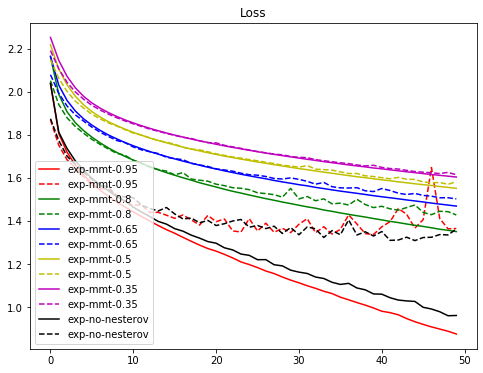

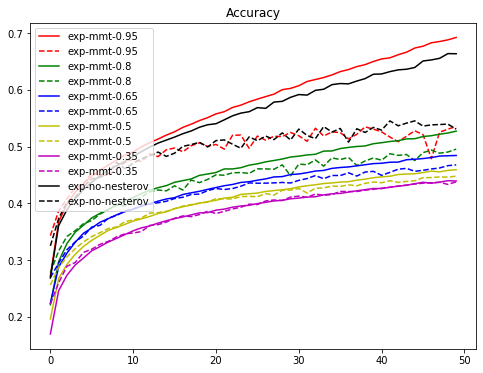

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()